# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table= soup.find("table", class_="table")


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_temps=[]
mars_dict = {}

table_headings = table.find_all("th")
 
heading_texts = [th.text.strip() for th in table_headings] 

rows = table.find_all('tr', class_='data-row') 
# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = row.find_all('td') 
    row_data =[tv.text.strip() for tv in row_data]
    result_dict = dict(zip(heading_texts, row_data))    
    mars_temps.append(result_dict)
   

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df= pd.DataFrame(mars_temps)

In [8]:
# Confirm DataFrame was created successfully
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
table_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
df=table_df
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months=df['month'].unique()
count=len(months)
count


12

In [13]:
# 2. How many Martian days' worth of data are there?
martian_days=df['sol'].count()
martian_days


1867

In [14]:
# 3. What is the average low temperature by month?

average_min_temp_per_month = df.groupby('month')['min_temp'].mean()
average_min_temp_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

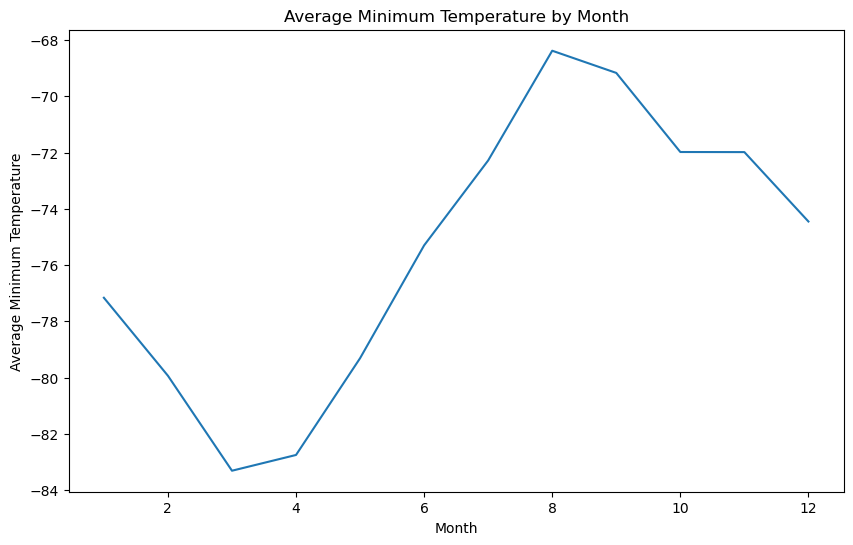

In [15]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_min_temp_per_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature by Month')
plt.xticks(rotation=0)  # Rotates x-axis labels to show them horizontally
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
minimum=min(average_min_temp_per_month)
maximum=max(average_min_temp_per_month)
print('min:', minimum, 'max:', maximum)

min: -83.30729166666667 max: -68.38297872340425


In [17]:
# 4. Average pressure by Martian month

average_pressure_per_month = df.groupby('month')['pressure'].mean()
average_pressure_per_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

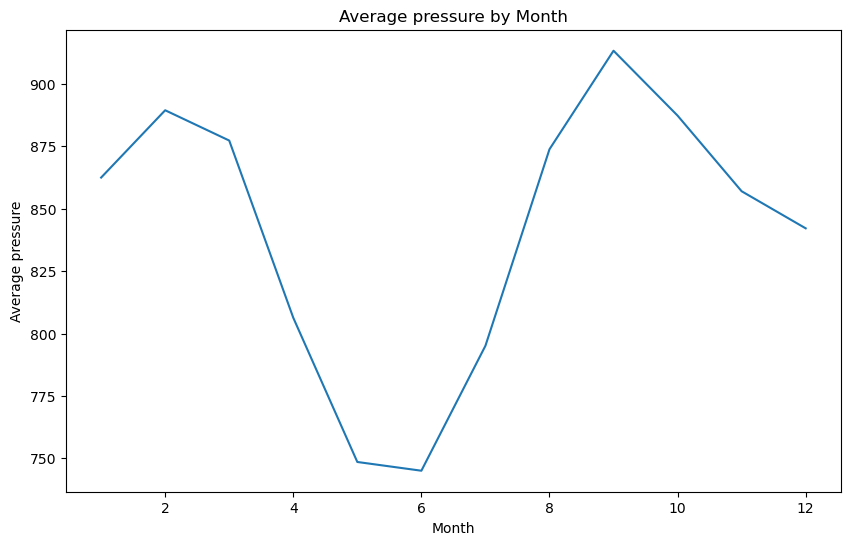

In [18]:
# Plot the average pressure by month
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_pressure_per_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average pressure')
plt.title('Average pressure by Month')
plt.xticks(rotation=0)  # Rotates x-axis labels to show them horizontally
plt.show()

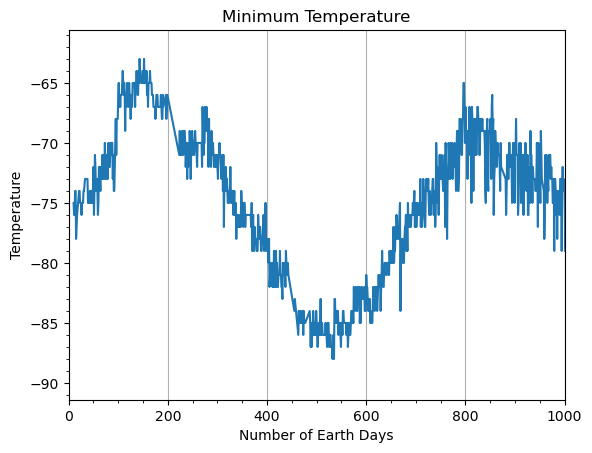

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.plot(df["sol"], df["min_temp"])
plt.title("Minimum Temperature")
plt.xlabel("Number of Earth Days")
plt.ylabel("Temperature")
plt.grid(True, axis='x')
plt.xlim(0, 1000)
plt.minorticks_on()
plt.show()

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df.sort_values(by='terrestrial_date', inplace=True)  #sort by terrestrial date 

started=0
last_month=0
s=''
sol0=0
sol1=0
fixed=0
for index, row in df.iterrows():        
    v=row['month']
    sol=row['sol']    
    
    s='sol:'+str(sol)+', month:'+str(v)+', started:' +str(started) #just for debugging/ to see if there's unsequential jump in sol values
    if started==1 and last_month>v:
        if fixed==0:
            sol1=sol
            fixed=1
        print('===>last_month:',last_month,', month:',v,', last sol:',sol ,', sol0:', sol0, ', sol1:', sol1)  
        
    if started==0:        
        if v==1:            
            started=1
            sol0=sol 
        
    last_month=v
        
count=sol1-sol0-1
print( 'There are', count, 'terrestrial days in a Martian year according to this dataset')


#--> sol:349, month:12, started: 0, c0: 0[sa]
#--> sol:350, month:12, started: 0, c0: 0[sa]
#--> sol:351, month:1, started: 0, c0: 0[sa][sb][se],count:1
#--> sol:352, month:1, started: 1, c0: 1[se],count:2
#--> sol:353, month:1, started: 1, c0: 2[se],count:3


#--> sol:1017, month:12, started: 1, c0: 619[se],count:620
#--> sol:1018, month:12, started: 1, c0: 620[se],count:621
#--> sol:1019, month:1, started: 1, c0: 621[se],count:622
#--> sol:1020, month:1, started: 1, c0: 622[se],count:623
#===>last_month: 12 , month: 1 , last sol: 1019 , sol0: 351 , sol1: 1019



===>last_month: 12 , month: 1 , last sol: 1019 , sol0: 351 , sol1: 1019
===>last_month: 12 , month: 1 , last sol: 1688 , sol0: 351 , sol1: 1019
There are 667 terrestrial days in a Martian year according to this dataset


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df.to_csv('part_two.csv', index=False)

In [21]:
browser.quit()